In [29]:
from module import *
import pandas as pd
import numpy as np
from IPython.display import Latex, display_latex

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
PRECISION = 3
np.set_printoptions(precision=PRECISION, suppress=True)
pd.options.display.float_format = "{:.3f}".format

# Introducción de datos

$$ \bar{P1ia} - \bar{P1ib} = R_A \tan{\frac{\alpha}{2}} + R_B \tan{\frac{\beta}{2}} $$
$$ \bar{P1ib} - \bar{P1ic} = R_B \tan{\frac{\beta}{2}} + R_C \tan{\frac{\theta}{2}} $$

In [32]:
# R -> Radios
# < -> Angulos en º
data = np.array(
    [
        # R           # <
        (118.604, np.deg2rad(55.304722)),
        (225.348, np.deg2rad(75.304722)),
        (232.108, np.deg2rad(40.788611)),
    ],
)
_ = pd.DataFrame(data, columns=['radios', 'angulos'])
__ = _.apply({'radios': lambda x: x, 'angulos': np.rad2deg})
radios = _['radios']
__

,radios,angulos
0,118.604,55.305
1,225.348,75.305
2,232.108,40.789


In [33]:
__.sort_values(by='radios')

,radios,angulos
0,118.604,55.305
1,225.348,75.305
2,232.108,40.789


# Cálculo de subtangentes

In [34]:
subtangentes = st_vec(data)
for idx, row in __.iterrows():
    A = np.float32(row['angulos'])
    R = np.float32(row['radios'])
    string = f'$ {R} \\times \\tan{A / 2}º \\qquad = {round(subtangentes[idx], PRECISION)} $'
    display_latex(Latex(string))
    
_['subtangentes'] = subtangentes
angulos = copy.deepcopy(_['angulos'])
_

,radios,angulos,subtangentes
0,118.604,0.965,62.143
1,225.348,1.314,173.870
2,232.108,0.712,86.294


# Cálculo de diagonales y de cotas progresivas

In [35]:
# Calculo de diagonales
diag_vec(data[::-1], st_=True)

array([[ 189.245,    2.026],
       [2553.437,    2.991]])

In [36]:
# Calculo de cotas
cotas = p_total(data, pi=0)
print(cotas)
cotas = cotas + np.abs(np.min(cotas))
cotas += radios[0] * angulos[0] / 2 # <- Cca
pd.DataFrame(cotas.reshape(-1,1), columns=['cotas progresivas'])

[-2615.58  -2501.097 -2204.919 -2039.682]


,cotas progresivas
0,57.241
1,171.724
2,467.902
3,633.139


# Elementos iniciales de cuadro de replanteo

In [37]:
expanded = expand__(data, pi=np.abs(np.min(cotas)) + 10_054.302, prec=10)
_ = pd.DataFrame(expanded, columns=['radio', 'angulo', 'cota', 'D'])
radio_pre0 = _['radio']
radio_pre0 = list(pd.concat([pd.Series([0]), radio_pre0[:-1]]))
radio_pre0 = np.array(radio_pre0)
_['radio_pre0'] = radio_pre0
# _['gamma'] = gamma_vec(expanded[:,1:3])
# _ = _.apply({'radio': lambda x: x, 'angulo': np.rad2deg, 'cota': lambda x: x, 'D': lambda x: x})
_

,radio,angulo,cota,D,radio_pre0
0,118.604,0.965,7495.963,0.000,0.000
1,118.604,0.965,7500.000,4.037,118.604
2,118.604,0.965,7510.000,10.000,118.604
3,118.604,0.965,7520.000,10.000,118.604
4,118.604,0.965,7530.000,10.000,118.604
...,...,...,...,...,...
57,232.108,0.712,8040.000,10.000,232.108
58,232.108,0.712,8050.000,10.000,232.108
59,232.108,0.712,8060.000,10.000,232.108
60,232.108,0.712,8070.000,10.000,232.108


## Cálculo de $\gamma$

In [38]:
_['gamma'] = _['D'] / (2 * _['radio'])
_

,radio,angulo,cota,D,radio_pre0,gamma
0,118.604,0.965,7495.963,0.000,0.000,0.000
1,118.604,0.965,7500.000,4.037,118.604,0.017
2,118.604,0.965,7510.000,10.000,118.604,0.042
3,118.604,0.965,7520.000,10.000,118.604,0.042
4,118.604,0.965,7530.000,10.000,118.604,0.042
...,...,...,...,...,...,...
57,232.108,0.712,8040.000,10.000,232.108,0.022
58,232.108,0.712,8050.000,10.000,232.108,0.022
59,232.108,0.712,8060.000,10.000,232.108,0.022
60,232.108,0.712,8070.000,10.000,232.108,0.022


## Cálculo de $D$ acumulado

In [39]:
_['D_sum'] = np.add.accumulate(_['D'])
# _['D_sum'] = D_sum(_)
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum
0,118.604,0.965,7495.963,0.000,0.000,0.000,0.000
1,118.604,0.965,7500.000,4.037,118.604,0.017,4.037
2,118.604,0.965,7510.000,10.000,118.604,0.042,14.037
3,118.604,0.965,7520.000,10.000,118.604,0.042,24.037
4,118.604,0.965,7530.000,10.000,118.604,0.042,34.037
...,...,...,...,...,...,...,...
57,232.108,0.712,8040.000,10.000,232.108,0.022,544.037
58,232.108,0.712,8050.000,10.000,232.108,0.022,554.037
59,232.108,0.712,8060.000,10.000,232.108,0.022,564.037
60,232.108,0.712,8070.000,10.000,232.108,0.022,574.037


## Cálculo de $\gamma$ acumulado

In [40]:
_['gamma']

0    0.000
1    0.017
2    0.042
3    0.042
4    0.042
      ... 
57   0.022
58   0.022
59   0.022
60   0.022
61     inf
Name: gamma, Length: 62, dtype: float64

In [41]:
_['gamma_sum'] = np.add.accumulate(_['gamma'])
# _['gamma_sum'] = gamma_sum(_)
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum
0,118.604,0.965,7495.963,0.000,0.000,0.000,0.000,0.000
1,118.604,0.965,7500.000,4.037,118.604,0.017,4.037,0.017
2,118.604,0.965,7510.000,10.000,118.604,0.042,14.037,0.059
3,118.604,0.965,7520.000,10.000,118.604,0.042,24.037,0.101
4,118.604,0.965,7530.000,10.000,118.604,0.042,34.037,0.143
...,...,...,...,...,...,...,...,...
57,232.108,0.712,8040.000,10.000,232.108,0.022,544.037,1.426
58,232.108,0.712,8050.000,10.000,232.108,0.022,554.037,1.447
59,232.108,0.712,8060.000,10.000,232.108,0.022,564.037,1.469
60,232.108,0.712,8070.000,10.000,232.108,0.022,574.037,1.490


In [42]:
radio_pre0 / 2

array([  0.   ,  59.302,  59.302,  59.302,  59.302,  59.302,  59.302,
        59.302,  59.302,  59.302,  59.302,  59.302,  59.302,  59.302,
       112.674, 112.674, 112.674, 112.674, 112.674, 112.674, 112.674,
       112.674, 112.674, 112.674, 112.674, 112.674, 112.674, 112.674,
       112.674, 112.674, 112.674, 112.674, 112.674, 112.674, 112.674,
       112.674, 112.674, 112.674, 112.674, 112.674, 112.674, 112.674,
       112.674, 112.674, 116.054, 116.054, 116.054, 116.054, 116.054,
       116.054, 116.054, 116.054, 116.054, 116.054, 116.054, 116.054,
       116.054, 116.054, 116.054, 116.054, 116.054, 116.054])

## Cálculo de $lc$

In [43]:
# def lc_calc(dataframe):
arcos = angulos * radios
arcos = pd.concat((pd.Series((0,)),arcos))

def lc_sum(dataframe):
    llist = []
    piu = dataframe[dataframe['radio'] != dataframe['radio_pre0']]['lc']
    acc = 0
    iiter = iter(arcos)
    for idx, row in dataframe.iterrows():
        if row['radio_pre0'] != row['radio']:
            acc = 0
        acc += row['lc']
        llist.append(acc)
    return np.array(llist)

In [44]:
arcos

0     0.000
0   114.482
1   296.178
2   165.237
dtype: float64

In [45]:
# def lc_calc(dataframe):
#     llist = []
#     acc = 0
#     for idx, row in dataframe.iterrows():
#         if row['radio'] != row['radio_pre0']:
#             print(dataframe.iloc[idx+1]['lc']) # ['lc'] - dataframe[idx]['lc']
#             # print(idx)
#         yield row['lc'] - acc

In [46]:
# list(lc_calc(_))

In [47]:
# Gamma_sum se encuentra en radianes
_['lc'] = ( np.sin(_['gamma_sum']) * radio_pre0 * 2 )
# _['lc1'] = lc_sum(_)
_['lc - D_sum'] = _['lc'] - _['D_sum']
_

c:\Users\Cesar\.conda\envs\ds\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)


,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum
0,118.604,0.965,7495.963,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,118.604,0.965,7500.000,4.037,118.604,0.017,4.037,0.017,4.036,-0.000
2,118.604,0.965,7510.000,10.000,118.604,0.042,14.037,0.059,14.028,-0.008
3,118.604,0.965,7520.000,10.000,118.604,0.042,24.037,0.101,23.995,-0.041
4,118.604,0.965,7530.000,10.000,118.604,0.042,34.037,0.143,33.920,-0.117
...,...,...,...,...,...,...,...,...,...,...
57,232.108,0.712,8040.000,10.000,232.108,0.022,544.037,1.426,459.343,-84.693
58,232.108,0.712,8050.000,10.000,232.108,0.022,554.037,1.447,460.682,-93.355
59,232.108,0.712,8060.000,10.000,232.108,0.022,564.037,1.469,461.806,-102.230
60,232.108,0.712,8070.000,10.000,232.108,0.022,574.037,1.490,462.717,-111.320


### Cálculo de azimuts

Ya que utilizamos un sentido antihorario, tenemos que utilizar un azimut inverso al del útlimo punto y restando las diferencias generadas en lugar de sumarlas.
$$ \text{Azimut}_{\text{inverso}} = 180º - \text{Azimut} $$

In [48]:
az_init = np.pi - np.deg2rad(110.38194444)
_['azimut_inv'] = _['gamma_sum'] + az_init
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum,azimut_inv
0,118.604,0.965,7495.963,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.215
1,118.604,0.965,7500.000,4.037,118.604,0.017,4.037,0.017,4.036,-0.000,1.232
2,118.604,0.965,7510.000,10.000,118.604,0.042,14.037,0.059,14.028,-0.008,1.274
3,118.604,0.965,7520.000,10.000,118.604,0.042,24.037,0.101,23.995,-0.041,1.316
4,118.604,0.965,7530.000,10.000,118.604,0.042,34.037,0.143,33.920,-0.117,1.359
...,...,...,...,...,...,...,...,...,...,...,...
57,232.108,0.712,8040.000,10.000,232.108,0.022,544.037,1.426,459.343,-84.693,2.641
58,232.108,0.712,8050.000,10.000,232.108,0.022,554.037,1.447,460.682,-93.355,2.662
59,232.108,0.712,8060.000,10.000,232.108,0.022,564.037,1.469,461.806,-102.230,2.684
60,232.108,0.712,8070.000,10.000,232.108,0.022,574.037,1.490,462.717,-111.320,2.705


## Cálculo de coordenadas

$$
N = N_{\text{anterior}} + L_c \times \cos(\text{Azimut}_\text{inverso}) \\
E = E_{\text{anterior}} - L_c \times \sin(\text{Azimut}_\text{inverso})
$$

In [49]:
N_init = 8_822_222
E_init = 482_777
_['delta_N'] = _[['azimut_inv', 'lc']].apply(lambda x: np.cos(x['azimut_inv']) * x['lc'], axis=1)
_['delta_E'] = _[['azimut_inv', 'lc']].apply(lambda x: -np.sin(x['azimut_inv']) * x['lc'], axis=1)
_['N'] = _['delta_N'] + N_init
_['E'] = _['delta_E'] + E_init
_

C:\Users\Cesar\AppData\Local\Temp\ipykernel_4252\2004008128.py:3: RuntimeWarning: invalid value encountered in cos
  _['delta_N'] = _[['azimut_inv', 'lc']].apply(lambda x: np.cos(x['azimut_inv']) * x['lc'], axis=1)
C:\Users\Cesar\AppData\Local\Temp\ipykernel_4252\2004008128.py:4: RuntimeWarning: invalid value encountered in sin
  _['delta_E'] = _[['azimut_inv', 'lc']].apply(lambda x: -np.sin(x['azimut_inv']) * x['lc'], axis=1)


,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum,azimut_inv,delta_N,delta_E,N,E
0,118.604,0.965,7495.963,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.215,0.000,-0.000,8822222.000,482777.000
1,118.604,0.965,7500.000,4.037,118.604,0.017,4.037,0.017,4.036,-0.000,1.232,1.341,-3.807,8822223.341,482773.193
2,118.604,0.965,7510.000,10.000,118.604,0.042,14.037,0.059,14.028,-0.008,1.274,4.100,-13.416,8822226.100,482763.584
3,118.604,0.965,7520.000,10.000,118.604,0.042,24.037,0.101,23.995,-0.041,1.316,6.039,-23.223,8822228.039,482753.777
4,118.604,0.965,7530.000,10.000,118.604,0.042,34.037,0.143,33.920,-0.117,1.359,7.145,-33.159,8822229.145,482743.841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,232.108,0.712,8040.000,10.000,232.108,0.022,544.037,1.426,459.343,-84.693,2.641,-402.946,-220.523,8821819.054,482556.477
58,232.108,0.712,8050.000,10.000,232.108,0.022,554.037,1.447,460.682,-93.355,2.662,-408.790,-212.410,8821813.210,482564.590
59,232.108,0.712,8060.000,10.000,232.108,0.022,564.037,1.469,461.806,-102.230,2.684,-414.280,-204.052,8821807.720,482572.948
60,232.108,0.712,8070.000,10.000,232.108,0.022,574.037,1.490,462.717,-111.320,2.705,-419.404,-195.466,8821802.596,482581.534


In [50]:
np.max(abs(_['lc - D_sum']))

111.31985102347221

In [51]:
_.query('radio != radio_pre0')['lc - D_sum'].iloc[:]

0     0.000
13   -4.580
43   -1.433
61      NaN
Name: lc - D_sum, dtype: float64

# Guardando resultados

In [52]:
_.to_excel("mayra.xlsx", index=False)
np.add.accumulate(angulos / 2)[0]

0.48262474540007166

In [53]:
np.sin(angulos / 2) * radios * 2

0   110.090
1   275.316
2   161.769
dtype: float64

# Gráfica (no proporcional)

In [54]:
_.columns

Index(['radio', 'angulo', 'cota', 'D', 'radio_pre0', 'gamma', 'D_sum',
       'gamma_sum', 'lc', 'lc - D_sum', 'azimut_inv', 'delta_N', 'delta_E',
       'N', 'E'],
      dtype='object')

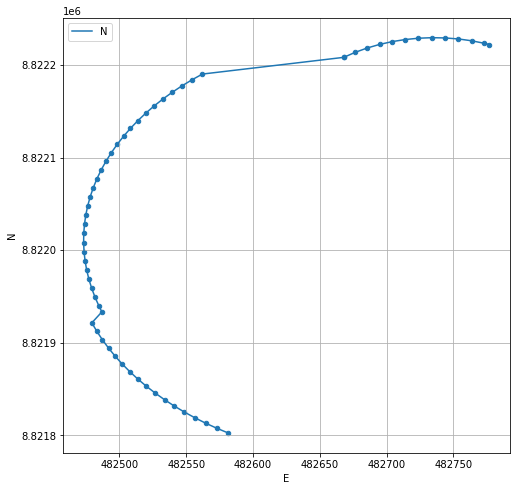

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8), )
_[['N', 'E']].plot(x='E', y='N', kind='scatter', ax=ax)
_[['N', 'E']].plot(x='E', y='N', ax=ax)
ax.grid()
plt.show()